In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("YOUR_WORK_SPACE").project("YOUR_PROJECT_NAME")
dataset = project.version(20).download("yolov8")


# Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=40 imgsz=800 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 188MB/s]
New https://pypi.org/project/ultralytics/8.0.200 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Classroom-Cell-Phone-Detection-15/data.yaml, epochs=60, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch601.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch602.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1697973737.4e3605fa7559.1577.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch600.jpg


/content


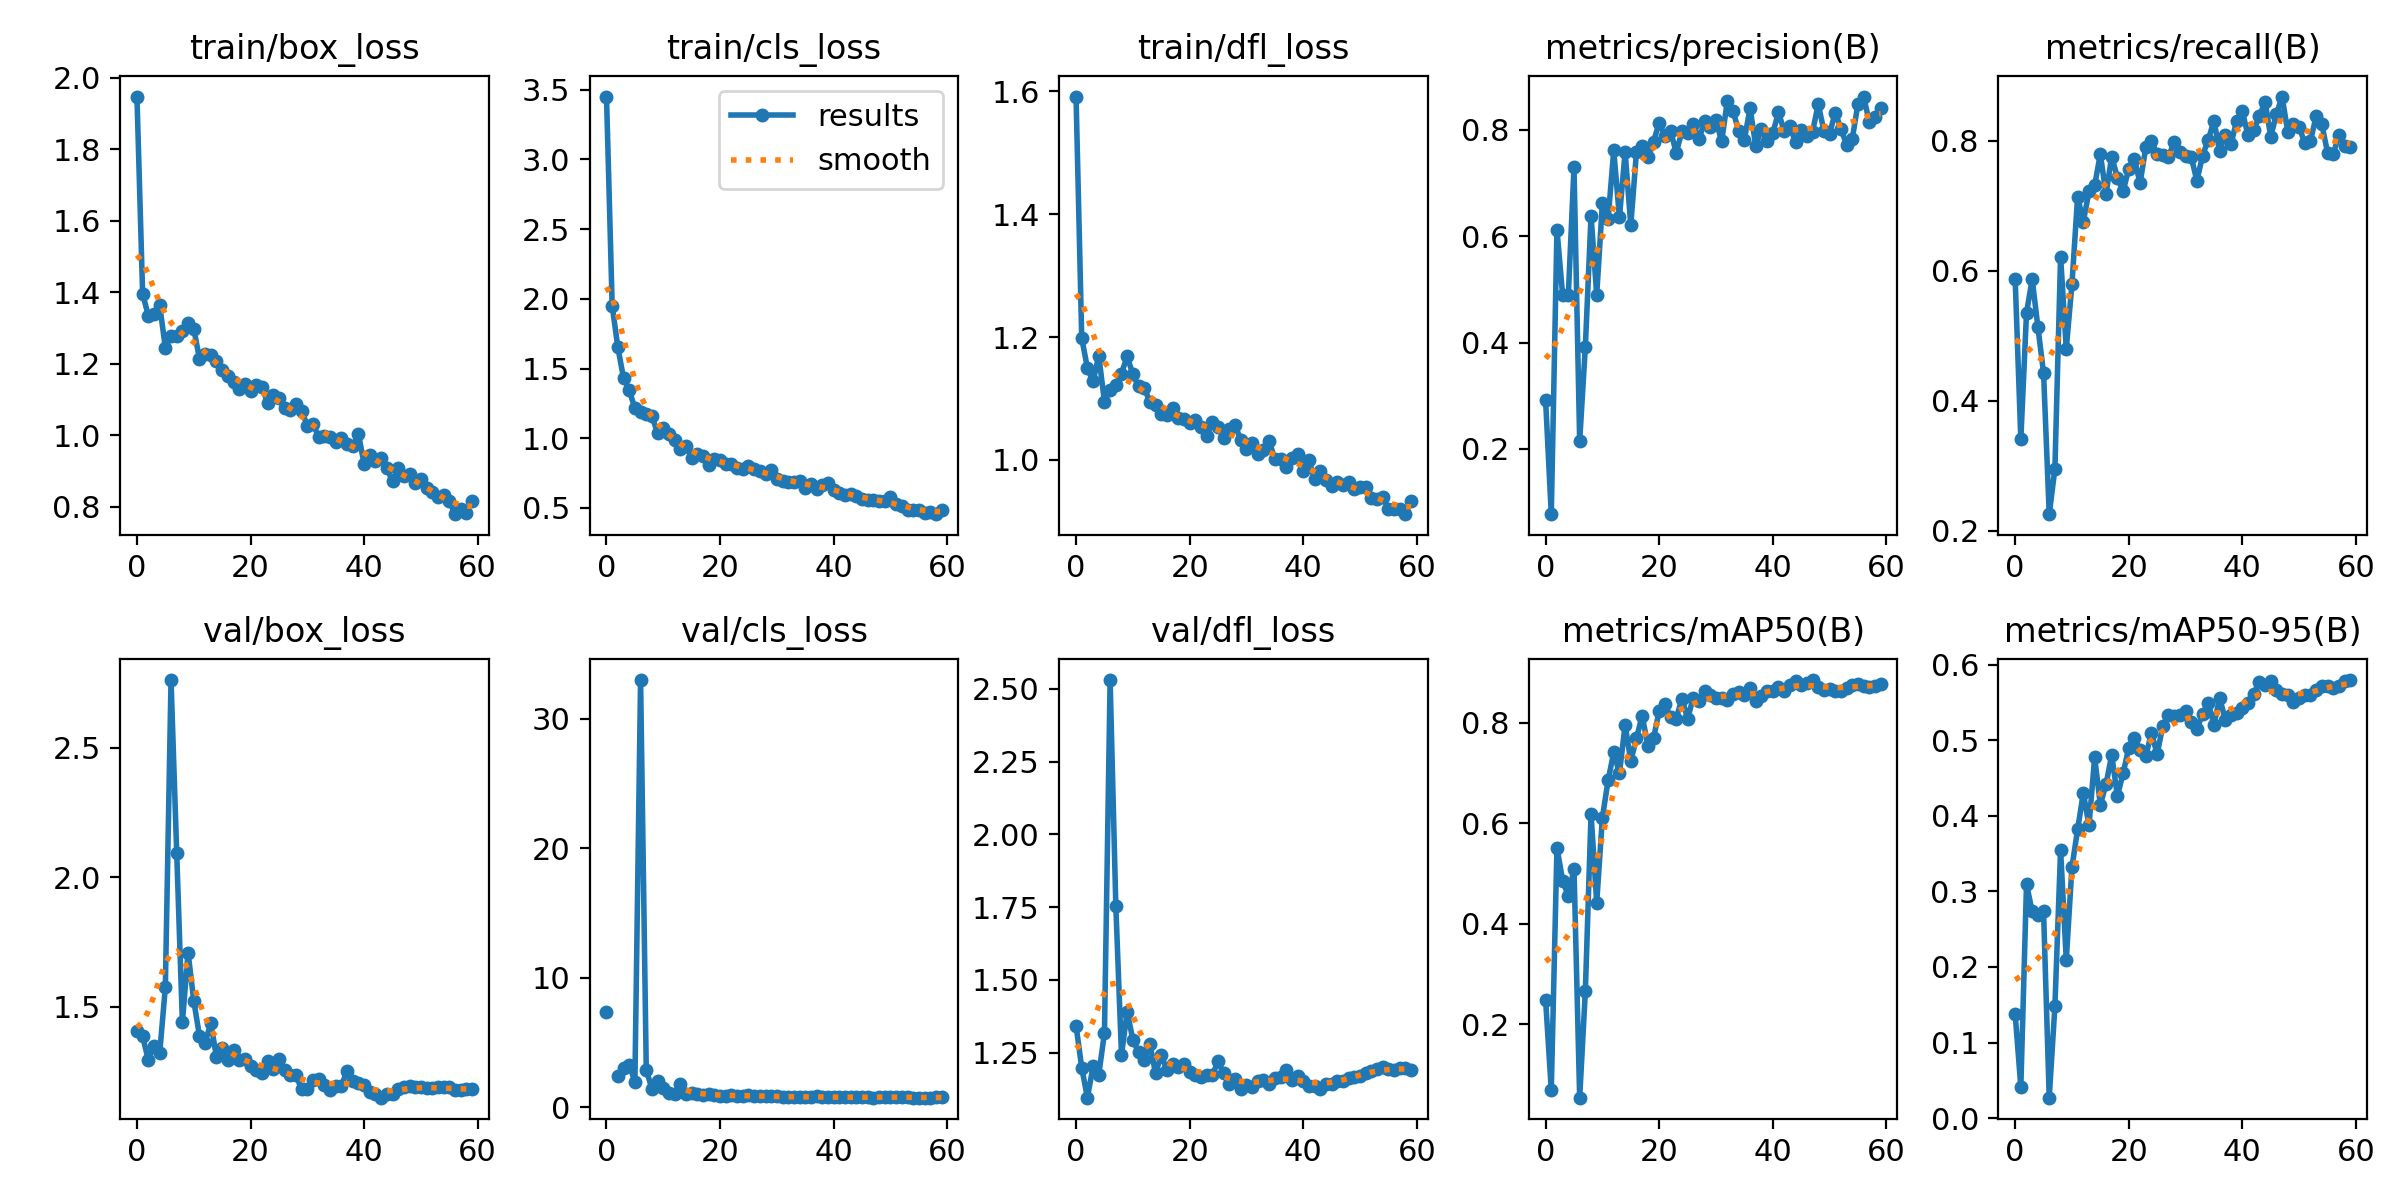

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients
val: Scanning /content/datasets/Classroom-Cell-Phone-Detection-15/valid/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100% 51/51 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:08<00:00,  2.05s/it]
                   all         51        431      0.839      0.789      0.877       0.58
           cell-phones         51        220      0.871      0.782      0.891      0.537
                person         51        211      0.808      0.796      0.862      0.624
Speed: 11.0ms preprocess, 35.9ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/val


# Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.05 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients

image 1/24 /content/datasets/Classroom-Cell-Phone-Detection-15/test/images/Class_1_Video_1_mp4-11_jpg.rf.1b755496669726d0731361407fb7575a.jpg: 480x800 8 cell-phoness, 6 persons, 197.7ms
image 2/24 /content/datasets/Classroom-Cell-Phone-Detection-15/test/images/Class_1_Video_1_mp4-22_jpg.rf.aa869c9a3e0a5e55099c3b33395ef6ae.jpg: 480x800 5 cell-phoness, 4 persons, 35.9ms
image 3/24 /content/datasets/Classroom-Cell-Phone-Detection-15/test/images/Class_1_Video_2_mp4-2_jpg.rf.d92613e38fc0bf428efd313a0b17bd8b.jpg: 480x800 5 cell-phoness, 7 persons, 35.8ms
image 4/24 /content/datasets/Classroom-Cell-Phone-Detection-15/test/images/Class_2_Video_1_mp4-0_jpg.rf.ce0f60cd4a08f0fd6097bea6616bfb3f.jpg: 480x800 5 cell-phoness, 5 persons, 35.8ms
image 5/24 /content/datasets/Classroom-Cell-Phone-Detection-15/test/images/Class_2_Video_1_mp4-

# Deploy the Model

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"MODEL_PATH")